<a href="https://colab.research.google.com/github/SeptianLee/TI05_Septian_0110223149/blob/main/Tugas_DM_praktikum3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIK AWAL**

In [1]:
# import library
import pandas as pd
# mounting file drive
from google.colab import drive
drive.mount('/content/gdrive')
# membaca file dari direktori file csv
df = pd.read_csv("gdrive/My Drive/ColabDataMining/dataset/smoking_health_data_final.csv")
df

Mounted at /content/gdrive


,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0
...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60.0,254.0
3896,49,male,yes,70,123/75,60.0,213.0
3897,56,male,yes,70,125/79,60.0,246.0
3898,50,male,yes,85,134/95,60.0,340.0


In [2]:
# info() memberikan jumlah total baris,
# kolom, tipe data, dan jumlah nilai non-null setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


In [3]:
# Menampilkan ringkasan statistik deskriptif dari DataFrame 'df'
df.describe()

,age,heart_rate,cigs_per_day,chol
count,3900.000000,3900.000000,3886.000000,3893.000000
mean,49.537949,75.688974,9.168554,236.595941
std,8.559275,12.015376,12.037999,44.375365
min,32.000000,44.000000,0.000000,113.000000
25%,42.000000,68.000000,0.000000,206.000000
50%,49.000000,75.000000,0.000000,234.000000
75%,56.000000,82.000000,20.000000,263.000000
max,70.000000,143.000000,70.000000,696.000000


In [4]:
# Mengecek jumlah nilai yang hilang (null) di setiap kolom dalam DataFrame 'df'
df.isnull().sum()

,0
age,0
sex,0
current_smoker,0
heart_rate,0
blood_pressure,0
cigs_per_day,14
chol,7


In [5]:
# Daftar kolom yang akan dihapus dari DataFrame
columns_drop = ['cigs_per_day','chol']
# Menghapus kolom yang ada di daftar 'columns_drop' dari DataFrame 'df'
df.drop(columns = columns_drop, inplace=True)
df

,age,sex,current_smoker,heart_rate,blood_pressure
0,54,male,yes,95,110/72
1,45,male,yes,64,121/72
2,58,male,yes,81,127.5/76
3,42,male,yes,90,122.5/80
4,42,male,yes,62,119/80
...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5
3896,49,male,yes,70,123/75
3897,56,male,yes,70,125/79
3898,50,male,yes,85,134/95


In [6]:
#df.set_index('Identifier', inplace=True)
df

,age,sex,current_smoker,heart_rate,blood_pressure
0,54,male,yes,95,110/72
1,45,male,yes,64,121/72
2,58,male,yes,81,127.5/76
3,42,male,yes,90,122.5/80
4,42,male,yes,62,119/80
...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5
3896,49,male,yes,70,123/75
3897,56,male,yes,70,125/79
3898,50,male,yes,85,134/95


In [7]:
# Mengubah nama kolom pada DataFrame 'df' agar lebih mudah dipahami
df.rename(columns={
    'age':'umur',
    'sex':'kelamin',
    'current_smoker':'status_merokok',
    'heart_rate':'detak_jantung',
    'blood_pressure':'tekanan_darah',
}, inplace=True)

# Tampilkan DataFrame setelah perubahan nama kolom
df

,umur,kelamin,status_merokok,detak_jantung,tekanan_darah
0,54,male,yes,95,110/72
1,45,male,yes,64,121/72
2,58,male,yes,81,127.5/76
3,42,male,yes,90,122.5/80
4,42,male,yes,62,119/80
...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5
3896,49,male,yes,70,123/75
3897,56,male,yes,70,125/79
3898,50,male,yes,85,134/95


# **VISUALISASI**

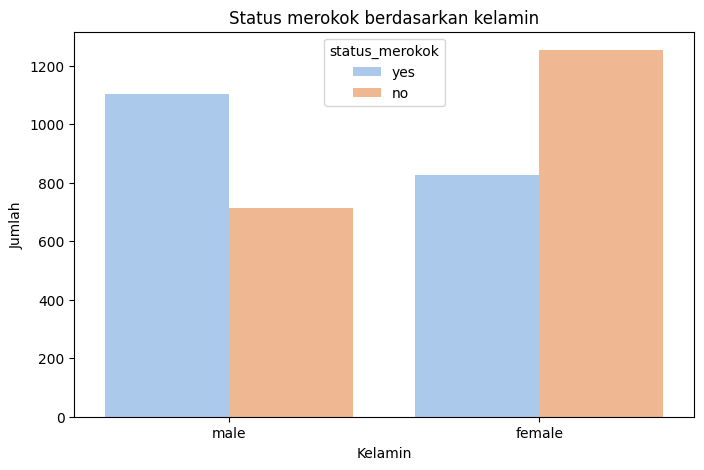

In [17]:
# @title Status merokok berdasarkan kelamin

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='kelamin', hue='status_merokok', data=df, palette='pastel')
plt.title('Status merokok berdasarkan kelamin')
plt.xlabel('Kelamin')
_ = plt.ylabel('Jumlah')


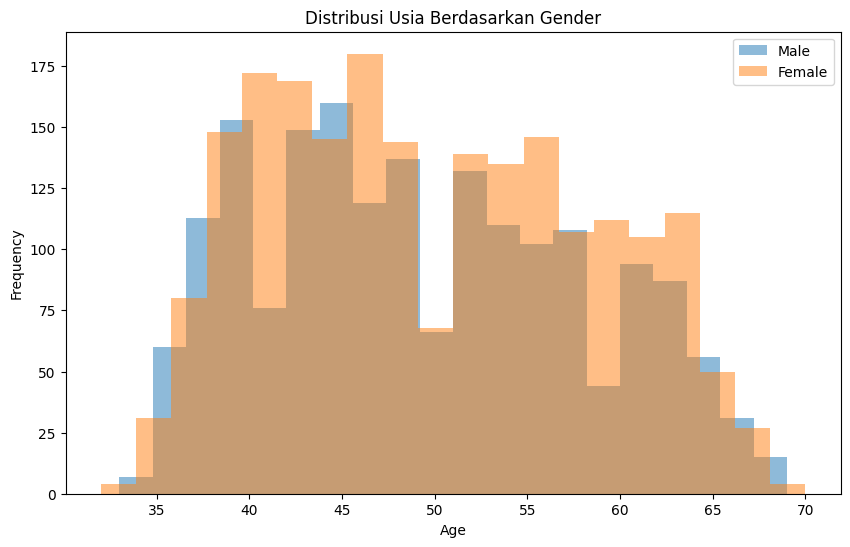

In [14]:
# @title Distribusi Usia Berdasarkan Gender

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df[df['kelamin'] == 'male']['umur'], alpha=0.5, label='Male', bins=20)
plt.hist(df[df['kelamin'] == 'female']['umur'], alpha=0.5, label='Female', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribusi Usia Berdasarkan Gender')
_ = plt.legend()

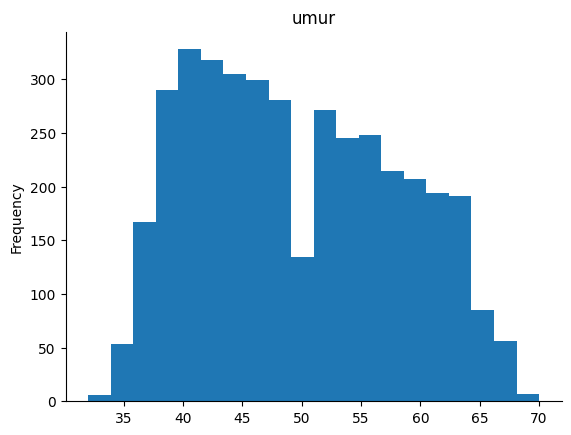

In [9]:
# @title umur

from matplotlib import pyplot as plt
df['umur'].plot(kind='hist', bins=20, title='umur')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **NORMALISASI**

In [10]:
#!pip install sklearn


In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=[np.number])

# Normalisasi kolom numerik
scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(numerical_df)

# Gabungkan kembali kolom 'kelamin' atau kolom non-numerik lainnya
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_df.columns)
scaled_df = pd.concat([scaled_df, df[['kelamin']].reset_index(drop=True)], axis=1)

print("Data Asli:")
print(df)
print("\nData Setelah min-max scaling:")
print(scaled_df)


Data Asli:
      umur kelamin status_merokok  detak_jantung tekanan_darah
0       54    male            yes             95        110/72
1       45    male            yes             64        121/72
2       58    male            yes             81      127.5/76
3       42    male            yes             90      122.5/80
4       42    male            yes             62        119/80
...    ...     ...            ...            ...           ...
3895    37    male            yes             88    122.5/82.5
3896    49    male            yes             70        123/75
3897    56    male            yes             70        125/79
3898    50    male            yes             85        134/95
3899    40    male            yes             98        132/86

[3900 rows x 5 columns]

Data Setelah min-max scaling:
          umur  detak_jantung kelamin
0     0.578947       0.515152    male
1     0.342105       0.202020    male
2     0.684211       0.373737    male
3     0.263158       0.46

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=[np.number])

# Normalisasi kolom numerik menggunakan StandardScaler
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(numerical_df)

# Gabungkan kembali kolom 'kelamin' atau kolom non-numerik lainnya
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_df.columns)
scaled_df = pd.concat([scaled_df, df[['kelamin']].reset_index(drop=True)], axis=1)

print("Data Asli:")
print(df)
print("\nData Setelah z_score transformation:")
print(scaled_df)


Data Asli:
      umur kelamin status_merokok  detak_jantung tekanan_darah
0       54    male            yes             95        110/72
1       45    male            yes             64        121/72
2       58    male            yes             81      127.5/76
3       42    male            yes             90      122.5/80
4       42    male            yes             62        119/80
...    ...     ...            ...            ...           ...
3895    37    male            yes             88    122.5/82.5
3896    49    male            yes             70        123/75
3897    56    male            yes             70        125/79
3898    50    male            yes             85        134/95
3899    40    male            yes             98        132/86

[3900 rows x 5 columns]

Data Setelah z_score transformation:
          umur  detak_jantung kelamin
0     0.521379       1.607399    male
1    -0.530247      -0.972959    male
2     0.988768       0.442076    male
3    -0.880789    

In [13]:
# Tentukan scaling factor
scaling_faktor = 1000

# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=[np.number])

# Lakukan scaling manual dengan scaling factor
scaled_numerical = numerical_df / scaling_faktor

# Gabungkan kembali kolom non-numerik
scaled_df = pd.concat([scaled_numerical, df[['kelamin']].reset_index(drop=True)], axis=1)

print("Data Asli:")
print(df)
print("\nData Setelah Decimal Scaling dengan Scaling Factor 1000:")
print(scaled_df)

Data Asli:
      umur kelamin status_merokok  detak_jantung tekanan_darah
0       54    male            yes             95        110/72
1       45    male            yes             64        121/72
2       58    male            yes             81      127.5/76
3       42    male            yes             90      122.5/80
4       42    male            yes             62        119/80
...    ...     ...            ...            ...           ...
3895    37    male            yes             88    122.5/82.5
3896    49    male            yes             70        123/75
3897    56    male            yes             70        125/79
3898    50    male            yes             85        134/95
3899    40    male            yes             98        132/86

[3900 rows x 5 columns]

Data Setelah Decimal Scaling dengan Scaling Factor 1000:
       umur  detak_jantung kelamin
0     0.054          0.095    male
1     0.045          0.064    male
2     0.058          0.081    male
3     0.04